In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('spam.csv',encoding='latin-1')

In [ ]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [ ]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [ ]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
#renaming
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
#encoding on target
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['target']=le.fit_transform(df['target'])
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
#null
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

**EDA**

In [ ]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

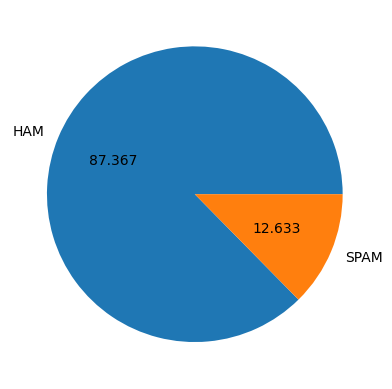

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['HAM','SPAM'],autopct="%.3f")
plt.show()

In [ ]:
#importing natural language processing toolkit
import nltk
df['no_of_char']=df['text'].apply(len)

<ipython-input-92-e706cb6d7a57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_of_char']=df['text'].apply(len)


In [ ]:
#number of words
nltk.download('punkt')
df['no_of_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-93-55d563414deb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_of_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [ ]:
df

,target,text,no_of_char,no_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [ ]:
df['no_of_st']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df['no_of_st']

<ipython-input-95-4bec19773487>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_of_st']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: no_of_st, Length: 5169, dtype: int64

<Axes: xlabel='no_of_char', ylabel='Count'>

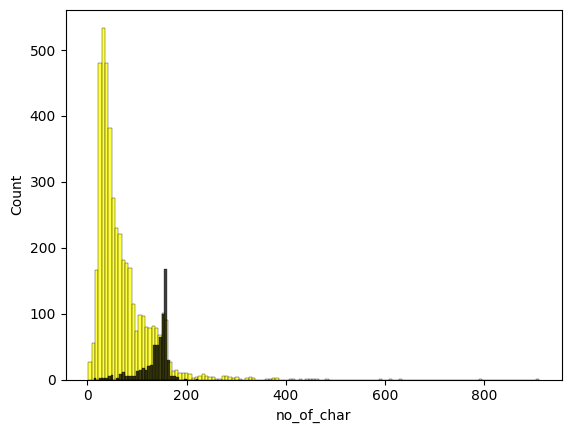

In [ ]:
#ploting no of char for both spam and ham
import seaborn as sns
sns.histplot(df[df['target']==0]['no_of_char'],color='yellow')
sns.histplot(df[df['target']==1]['no_of_char'],color='black')

In [ ]:
df

,target,text,no_of_char,no_of_words,no_of_st
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [ ]:
# separating the data as texts and label

x = df["text"]

y = df['target']

In [ ]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [ ]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5169, dtype: int64

Splitting Dataset into Traing and Testing Data


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3,test_size=0.20)
x_train

4443                       COME BACK TO TAMPA FFFFUUUUUUU
982     Congrats! 2 mobile 3G Videophones R yours. cal...
3822    Please protect yourself from e-threats. SIB ne...
3924       As if i wasn't having enough trouble sleeping.
4927    Just hopeing that wasnÛ÷t too pissed up to re...
                              ...                        
806      sure, but make sure he knows we ain't smokin yet
990                                          26th OF JULY
1723    Hi Jon, Pete here, Ive bin 2 Spain recently & ...
3519    No it will reach by 9 only. She telling she wi...
1745    IåÕm cool ta luv but v.tired 2 cause i have be...
Name: text, Length: 4135, dtype: object

In [ ]:
y_train

4443    0
982     1
3822    0
3924    0
4927    0
       ..
806     0
990     0
1723    0
3519    0
1745    0
Name: target, Length: 4135, dtype: int64

Feature Extraction


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer()
Xtrain_features = count.fit_transform(x_train.values)
Xtest_features = count.transform(x_test.values).toarray()

In [ ]:
y_test.dtype


dtype('int64')

In [ ]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [ ]:
x_train

4443                       COME BACK TO TAMPA FFFFUUUUUUU
982     Congrats! 2 mobile 3G Videophones R yours. cal...
3822    Please protect yourself from e-threats. SIB ne...
3924       As if i wasn't having enough trouble sleeping.
4927    Just hopeing that wasnÛ÷t too pissed up to re...
                              ...                        
806      sure, but make sure he knows we ain't smokin yet
990                                          26th OF JULY
1723    Hi Jon, Pete here, Ive bin 2 Spain recently & ...
3519    No it will reach by 9 only. She telling she wi...
1745    IåÕm cool ta luv but v.tired 2 cause i have be...
Name: text, Length: 4135, dtype: object

In [ ]:
print(Xtrain_features)

  (0, 1879)	1
  (0, 1170)	1
  (0, 6840)	1
  (0, 6610)	1
  (0, 2779)	1
  (1, 1939)	1
  (1, 4467)	1
  (1, 453)	1
  (1, 7176)	1
  (1, 7594)	1
  (1, 1577)	1
  (1, 203)	1
  (1, 4768)	1
  (1, 7175)	1
  (1, 7390)	1
  (1, 7590)	1
  (1, 4309)	1
  (1, 5157)	1
  (1, 3732)	1
  (1, 3015)	1
  (1, 2333)	1
  (1, 5210)	1
  (1, 4577)	1
  (1, 4731)	1
  (1, 5615)	1
  :	:
  (4134, 3290)	2
  (4134, 4817)	1
  (4134, 1546)	1
  (4134, 4195)	1
  (4134, 891)	1
  (4134, 1092)	1
  (4134, 1261)	1
  (4134, 7302)	1
  (4134, 6595)	1
  (4134, 1624)	1
  (4134, 1977)	1
  (4134, 7438)	1
  (4134, 6189)	1
  (4134, 6815)	1
  (4134, 2357)	1
  (4134, 4093)	1
  (4134, 6583)	1
  (4134, 5934)	1
  (4134, 1661)	1
  (4134, 5153)	1
  (4134, 6292)	1
  (4134, 3707)	1
  (4134, 6172)	1
  (4134, 3624)	1
  (4134, 4785)	1


In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(Xtrain_features,y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(Xtrain_features)

In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred)

0.9939540507859734

In [ ]:
input_mail = ["	SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info"]

# convert text to feature vectors
input_data_features = count.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('spam mail')

else:
  print('ham mail')

[1]
spam mail
